### Fine Tip Clearance Test Objective


### Procedure
- Ensure the drone is positioned on the tester rails such that the fishing line is slack
- Fix the current limit of the DC power supply connected in parallel with the lead acid battery to the same value for all tests. This should be a value between 2 and 8 amps, since the supply is fused at 10A
- Initiate sweep from 30-100% throttle in increments of 10%, holding each throttle for 10 seconds.
- At each throttle step, allow ~2s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Coarse Tip Clearance Test Configurations
| Static Tip Clearance | Clearance to Height Ratio (%) |
|-                     |-                              |
| 1.0 mm               | 14.3 %                        |
| 0.9 mm               | 12.9 %                        |
| 0.8 mm               | 11.4 %                        |
| 0.7 mm               | 10.0 %                        |
| 0.6 mm               | 8.57 %                        |
| 0.5 mm               | 7.14 %                        |
| 0.4 mm               | 5.71 %                        |
| 0.3 mm               | 4.29 %                        |
| 0.2 mm               | 2.86 %                        |
| 0.1 mm               | 1.43 %                        |

### Hypothesis
- As tip clearance decreases, we expect thrust to electrical power efficiency (kgf/W) to increase.

In [28]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 30 to 100% throttle in increments of 10%, holding at each step for 10 seconds

In [29]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 10_000
step_range = np.arange(30, 101, 10)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=50, bottom_throttle=50, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=60, bottom_throttle=60, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=70, bottom_throttle=70, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=80, bottom_throttle=80, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=90, bottom_throttle=90, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=100, bottom_throttle=100, pitch_angle=None, roll_angle=None)])

In [30]:
print(plan)

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=50, bottom_throttle=50, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=60, bottom_throttle=60, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=70, bottom_throttle=70, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=80, bottom_throttle=80, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=90, bottom_throttle=90, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=100, bottom_throttle=100, pitch_angle=None, roll_angle=None)])


### Execute Tests

In [188]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 30000
mount_test_throttle = 80
perform_mounting_test = True

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

In [7]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

Tx: Begin new test spec
FAIL Rx: 
Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx: 
FAIL Rx: 
Arming...
FAIL Rx: 
Running test...
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: Starting test

Skipped rx
Rx: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx: 317,3771,0,13.986000,10.240000,0.101780,-0.264290,0.029304,0.000000

Rx: 4173,0,0,13.986000,10.240000,-0.029080,-0.180830,0.029304,0.000000

Rx: 8176,0,0,13.986000,10.240000,0.014540,-0.208650,0.029304,0.518775

Rx: 12174,0,0,13.986000,10.240000,0.014540,-0.264290,0.029304,0.000000

Rx: 16172,0,0,13.965000,10.240000,0.043620,-0.208650,0.029304,0.000000

Rx: 20178,0,0,13.986000,10.240000,0.043620,-0.041730,0.029304,0.000000

Rx: 24172,0,0,14.007000,10.240000,0

In [189]:
test_directory = Path("../test_data/revised_fine_single_prop/")

In [519]:
data_dict = {}
files = [
    # control
    "test_open_single_pb_0.csv",
    "test_open_single_pb_1.csv",
    "test_open_single_pb_2.csv",
    "test_open_single_pb_3.csv",
    
    # 1mm testing
    "test_1mm_single_pb_0.csv",
    "test_1mm_single_pb_1.csv",
    "test_1mm_single_pb_2.csv",
    "test_1mm_single_pb_3.csv",
    "test_1mm_single_pb_4.csv",
    "test_1mm_single_pb_5.csv",

    # "test_1mm_single_shell_lip_0.csv",
    # "test_1mm_single_shell_lip_1.csv",
    
    # #0.5mm testing
    "test_0.5mm_single_pb_0.csv",
    "test_0.5mm_single_pb_1.csv",
    "test_0.5mm_single_pb_2.csv",
    "test_0.5mm_single_pb_3.csv",
    
    # #0.4mm testing
    "test_0.4mm_single_pb_0.csv",
    "test_0.4mm_single_pb_1.csv",
    "test_0.4mm_single_pb_2.csv",
    "test_0.4mm_single_pb_3.csv",
    
    # "test_0.4mm_single_shell_lip_0.csv",
    # "test_0.4mm_single_shell_lip_1.csv",

    # #0.3mm testing
    "test_0.3mm_single_pb_0.csv",
    "test_0.3mm_single_pb_1.csv",
    "test_0.3mm_single_pb_2.csv",

    # #0.2mm testing
     "test_0.2mm_single_pb_0.csv",
     "test_0.2mm_single_pb_1.csv",
     "test_0.2mm_single_pb_2.csv",

    # "test_0.2mm_single_shell_lip_0.csv",
    # "test_0.2mm_single_shell_lip_1.csv",

    # "test_0.2mm_single_lip_0.csv",
    # "test_0.2mm_single_lip_1.csv",
    # "test_0.2mm_single_lip_2.csv",

    # "test_0.1mm_single_lip_0.csv",

    # #0.6mm testing
    "test_0.6mm_single_pb_0.csv",
    "test_0.6mm_single_pb_1.csv",
    "test_0.6mm_single_pb_2.csv",
    
    # #0.7mm testing
    # "test_0.7mm_single_pb_0.csv",
    # "test_0.7mm_single_pb_1.csv",
    "test_0.7mm_single_pb_2.csv",
    "test_0.7mm_single_pb_3.csv",
    "test_0.7mm_single_pb_4.csv",
    "test_0.7mm_single_pb_5.csv",

    # "test_0.7mm_single_shell_0.csv",
    # "test_0.7mm_single_shell_1.csv",

    # "test_0.7mm_single_shell_lip_0.csv",
    # "test_0.7mm_single_shell_lip_1.csv",

    # #0.8mm testing
    "test_0.8mm_single_pb_0.csv",
    "test_0.8mm_single_pb_1.csv",
    "test_0.8mm_single_pb_2.csv",
    
    # #0.9mm testing
    "test_0.9mm_single_pb_0.csv",
    "test_0.9mm_single_pb_1.csv",
    "test_0.9mm_single_pb_2.csv",
]

for file in files:
    data_dict[file] = test_run(
        filename=test_directory / file, plan=plan
    )

Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data


### Data Analysis

In [520]:
# Aggregate test data
tip_filename_regex = re.compile(r"test_(\d*\.?\d*)mm")


df_all = pd.concat(
    data_dict.values(),
    keys=[
        (
            file,
            (
                float(match.group(1))
                if (match := tip_filename_regex.match(file))
                else 0.0 #'Open Air'
            ),
        )
        for file in files
    ],
    names=["test_name", "tip_clearance_mm"],
).sort_index()
df_all

top_motor_rpm  \
test_name                  tip_clearance_mm time_ms                    
test_0.2mm_single_pb_0.csv 0.2              0.472                0.0   
                                            5.161                0.0   
                                            9.164                0.0   
                                            13.157               0.0   
                                            17.168               0.0   
...                                                              ...   
test_open_single_pb_3.csv  0.0              81968.176         1242.0   
                                            81972.168         1214.0   
                                            81976.176         1228.0   
                                            81980.168         1142.0   
                                            81984.169         1142.0   

                                                       bottom_motor_rpm  \
test_name                  tip_clearance_mm time_ms                       
test_0.2mm_single_pb_0.csv 0.2              0.472                   0.0   
                                            5.161                   0.0   
                                            9.164                   0.0   
                                            13.157                  0.0   
                                            17.168                  0.0   
...                                                                 ...   
test_open_single_pb_3.csv  0.0              81968.176               0.0   
                                            81972.168               0.0   
                                            81976.176               0.0   
                                            81980.168               0.0   
                                            81984.169               0.0   

                                                       batt_voltage_V  \
test_name                  tip_clearance_mm time_ms                     
test_0.2mm_single_pb_0.csv 0.2              0.472              15.183   
                                            5.161              14.364   
                                            9.164              14.133   
                                            13.157             14.028   
                                            17.168             13.965   
...                                                               ...   
test_open_single_pb_3.csv  0.0              81968.176          12.768   
                                            81972.168          12.831   
                                            81976.176          12.747   
                                            81980.168          12.747   
                                            81984.169          12.789   

                                                       batt_current_A  \
test_name                  tip_clearance_mm time_ms                     
test_0.2mm_single_pb_0.csv 0.2              0.472               10.24   
                                            5.161               10.24   
                                            9.164               10.24   
                                            13.157              10.24   
                                            17.168              10.24   
...                                                               ...   
test_open_single_pb_3.csv  0.0              81968.176           10.24   
                                            81972.168           10.24   
                                            81976.176           10.24   
                                            81980.168           10.24   
                                            81984.169           10.24   

                                                       top_current_A  \
test_name                  tip_clearance_mm time_ms                    
test_0.2mm_single_pb_0.csv 0.2              0.472           -0.14540   
                          

In [521]:
# Generate buckets for averaging based on step duration defined in testing
transient_offset_ms = (
    2000  # Ignore first 500 ms of each throttle step to allow transients to settle
)
stable_step_duration_ms = step_duration_ms - transient_offset_ms
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "tip_clearance_mm", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm  \
                                                              mean   
test_name                  tip_clearance_mm throttle                 
test_0.2mm_single_pb_0.csv 0.2              30           6753.6975   
                                            40           8600.7240   
                                            50          10148.6890   
                                            60          11673.1410   
                                            70          12650.1320   
...                                                            ...   
test_open_single_pb_3.csv  0.0              60          11045.1660   
                                            70          12082.7185   
                                            80          13143.2275   
                                            90          14071.8510   
                                            100         14983.0790   

                                                                  \
                                                             std   
test_name                  tip_clearance_mm throttle               
test_0.2mm_single_pb_0.csv 0.2              30         49.692360   
                                            40         93.244040   
                                            50        135.777248   
                                            60        273.486802   
                                            70        108.141166   
...                                                          ...   
test_open_single_pb_3.csv  0.0              60        174.675609   
                                            70        106.979412   
                                            80        317.678040   
                                            90        550.041288   
                                            100        99.021197   

                                                     bottom_motor_rpm       \
                                                                 mean  std   
test_name                  tip_clearance_mm throttle                         
test_0.2mm_single_pb_0.csv 0.2              30                    0.0  0.0   
                                            40                    0.0  0.0   
                                            50                    0.0  0.0   
                                            60                    0.0  0.0   
                                            70                    0.0  0.0   
...                                                               ...  ...   
test_open_single_pb_3.csv  0.0              60                    0.0  0.0   
                                            70                    0.0  0.0   
                                            80                    0.0  0.0   
                                            90                    0.0  0.0   
                                            100                   0.0  0.0   

                                                     batt_voltage_V            \
                                                               mean       std   
test_name                  tip_clearance_mm throttle                            
test_0.2mm_single_pb_0.csv 0.2              30            13.809390  0.029579   
                                            40            13.753982  0.012553   
                                            50            13.644656  0.027506   
                                            60            13.459425  0.026681   
                                            70            12.787961  0.046326   
...                                                             ...       ...   
test_open_single_pb_3.csv  0.0              60            13.021292  0.049310   
                                            70            12.650746  0.034611   
                                            80            12.338308  0.048986   
                                            90        

In [522]:
# Debug plots
# fig = plt.figure(figsize=(12, 6*len(data_dict)))
# subfigs = fig.subfigures(len(data_dict), 1)
# if not isinstance(subfigs, np.ndarray):
#     subfigs = np.array([subfigs])
# for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
#     axs = subfig.subplots(2, 4)
#     for ax, col in zip(axs.flat, grp):
#         grp.reset_index(("test_name", "tip_clearance_mm")).plot(ax=ax, y=col)
#         ax.hlines(
#             df_steps[col].loc[n]["mean"],
#             step_start_times + transient_offset_ms,
#             step_start_times + transient_offset_ms + stable_step_duration_ms,
#             colors="C1",
#             label="Averages",
#         )
#         ax.legend()
#     subfig.suptitle(n)
# Assuming `data_dict` is a dictionary
last_key = "test_0.2mm_single_lip_2.csv"# list(data_dict.keys())[-1]
last_data = data_dict[last_key]

fig = plt.figure(figsize=(12, 6))
subfig = fig.subplots(2, 4)

for ax, col in zip(subfig.flat, last_data.columns):
    last_data.plot(ax=ax, y=col)
    ax.hlines(
        df_steps[col].loc[last_key]["mean"],
        step_start_times + transient_offset_ms,
        step_start_times + transient_offset_ms + stable_step_duration_ms,
        colors="C1",
        label="Averages",
    )
    ax.legend()

fig.suptitle(last_key)
plt.show()

KeyError: 'test_0.2mm_single_lip_2.csv'

In [523]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = df_steps["thrust_N"]["std"] / 9.81 * 1e3

hall_current_mean = df_steps["top_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = df_steps["batt_voltage_V"]["std"] / batt_voltage_mean

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

rpm_avg = 0.5*(df_steps["top_motor_rpm"]["mean"] + df_steps["bottom_motor_rpm"]["mean"])

df_thrust_power = pd.DataFrame(
    {
        "rpm_avg": rpm_avg,
        "top_rpm": df_steps["top_motor_rpm"]["mean"],
        "bottom_rpm": df_steps["bottom_motor_rpm"]["mean"],
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "batt_voltage_mean": batt_voltage_mean,
        "hall_current_mean": hall_current_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": np.abs(batt_power_rel_err * batt_power_mean),
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

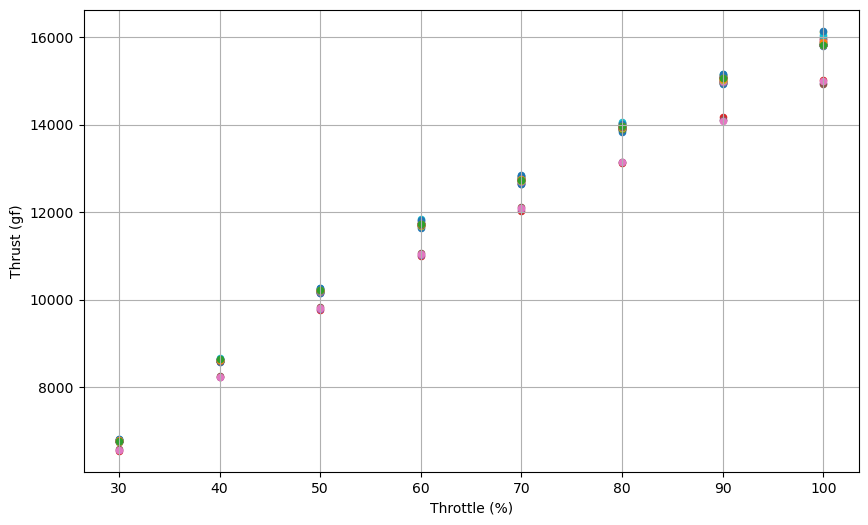

In [524]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x=grp.index.get_level_values("throttle"), y="top_rpm", data=grp, label=n, s=20)
plt.xlabel("Throttle (%)")
plt.ylabel("Thrust (gf)")
#plt.legend()
plt.grid()
plt.show()

In [526]:
df_thrust_power_agg = df_thrust_power[(df_thrust_power.index.get_level_values('throttle') >= 60)].groupby('tip_clearance_mm').agg('mean')

tip_clearance_mm = df_thrust_power_agg.index.get_level_values('tip_clearance_mm')[1:].to_numpy()
thrust_power_ratio = df_thrust_power_agg['thrust_power_g_W'].to_numpy()[1:]
tip_clearance_fit = np.polyfit(tip_clearance_mm, thrust_power_ratio, 1)
open_air_efficiency = df_thrust_power_agg.loc[0.0]['thrust_power_g_W']

pct_efficiency_improvement = 100 * (np.max(thrust_power_ratio) / open_air_efficiency - 1.0)
avg_tp_eff = np.mean(thrust_power_ratio)
pct_efficiency_improvement

#(avg_tp_eff - open_air_efficiency) / open_air_efficiency

1.3573329589370076

In [527]:
df_thrust_power_agg

,rpm_avg,top_rpm,bottom_rpm,thrust_mean_g,batt_power_mean,batt_voltage_mean,hall_current_mean,shunt_power_mean,thrust_power_g_W,shunt_thrust_power_g_W,batt_power_err,thrust_g_err,thrust_power_err
tip_clearance_mm,,,,,,,,,,,,,
0.0,6533.197738,13066.395475,0.0,615.854158,183.778810,12.340280,15.091558,203.822481,3.460874,3.062100,8.840405,4.689017,0.183071
0.2,6909.200783,13818.401567,0.0,524.189190,157.917713,12.564764,12.758644,180.133512,3.384795,2.898482,8.347927,3.670089,0.195397
0.3,6919.553433,13839.106867,0.0,537.356847,158.581889,12.592778,12.781994,180.682987,3.449058,2.960563,8.369974,3.735984,0.198438
0.4,6907.101887,13814.203775,0.0,539.172254,157.186633,12.582292,12.681125,180.471150,3.507850,2.978842,8.329947,3.034442,0.203714
0.5,6909.710700,13819.421400,0.0,528.077028,159.301640,12.604386,12.827104,182.457312,3.373833,2.879818,8.380191,3.334789,0.193512
0.6,6927.711233,13855.422467,0.0,518.065724,157.994355,12.595724,12.733119,180.183653,3.343130,2.862894,8.356698,2.981605,0.192480
0.7,6935.852888,13871.705775,0.0,502.704492,156.833791,12.462733,12.779131,174.693995,3.257847,2.858151,8.269982,3.054205,0.188058
0.8,6937.820933,13875.641867,0.0,498.736934,158.199035,12.530533,12.815669,177.075149,3.186074,2.789067,8.349476,3.085531,0.182306
0.9,6949.532750,13899.065500,0.0,489.827014,156.883399,12.444760,12.804904,173.949121,3.152766,2.784997,8.263878,3.421070,0.181880


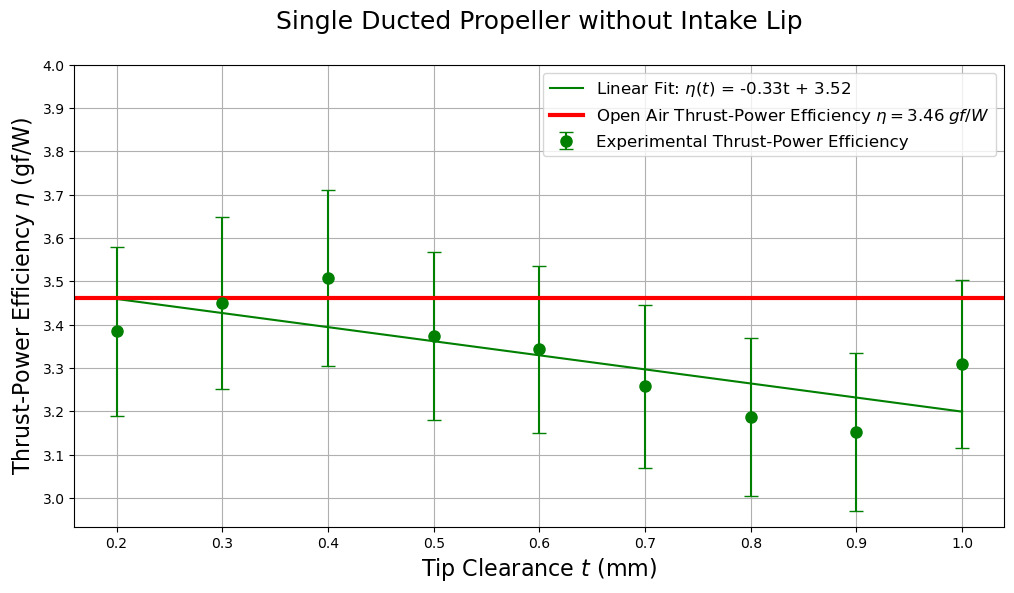

In [529]:
plt.figure(figsize=(12,6))

plt.errorbar(x = tip_clearance_mm, 
             y = thrust_power_ratio, 
             yerr = df_thrust_power_agg['thrust_power_err'].to_numpy()[1:],
             fmt='o', capsize=5, markersize=8, color='g', label='Experimental Thrust-Power Efficiency')
plt.plot(tip_clearance_mm, tip_clearance_fit[0]*tip_clearance_mm + tip_clearance_fit[1], label='Linear Fit: $\\eta(t)$ = {:.2f}t + {:.2f}'.format(tip_clearance_fit[0], tip_clearance_fit[1]), color='g')
plt.axhline(open_air_efficiency, label='Open Air Thrust-Power Efficiency $\\eta = {:.2f}\;gf/W$'.format(open_air_efficiency), linewidth=3, color='r')
plt.xlabel('Tip Clearance $t$ (mm)', fontsize=16)
plt.ylabel('Thrust-Power Efficiency $\\eta$ (gf/W)', fontsize=16)
plt.title('Single Ducted Propeller without Intake Lip\n', fontsize=18)
plt.yticks(np.arange(3, 4.01, 0.1))
plt.legend(fontsize=12)
plt.grid()

In [449]:
# Set nominal required thrust constants. Used as a benchmark to define region of interest for our data.
hover_thrust_g = 750
payload_thrust_g = 1200

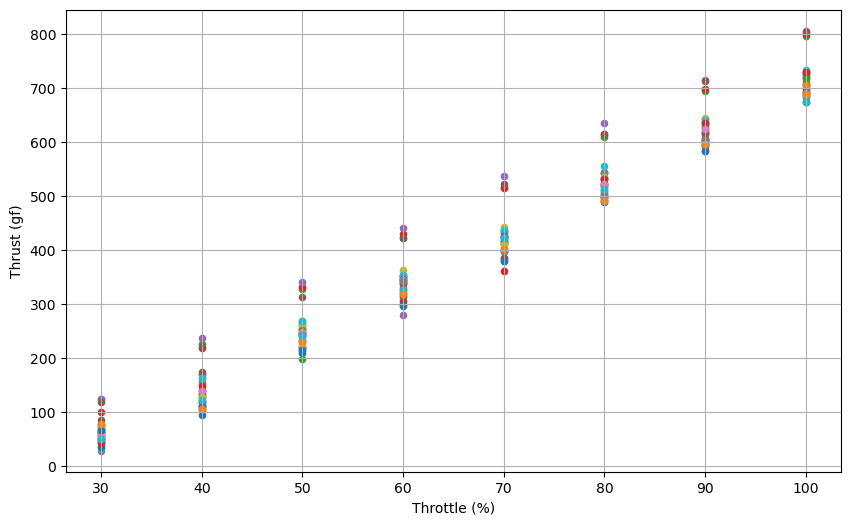

In [478]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x=grp.index.get_level_values("throttle"), y="thrust_mean_g", data=grp, label=n, s=20)
plt.xlabel("Throttle (%)")
plt.ylabel("Thrust (gf)")
#plt.legend()
plt.grid()
plt.show()

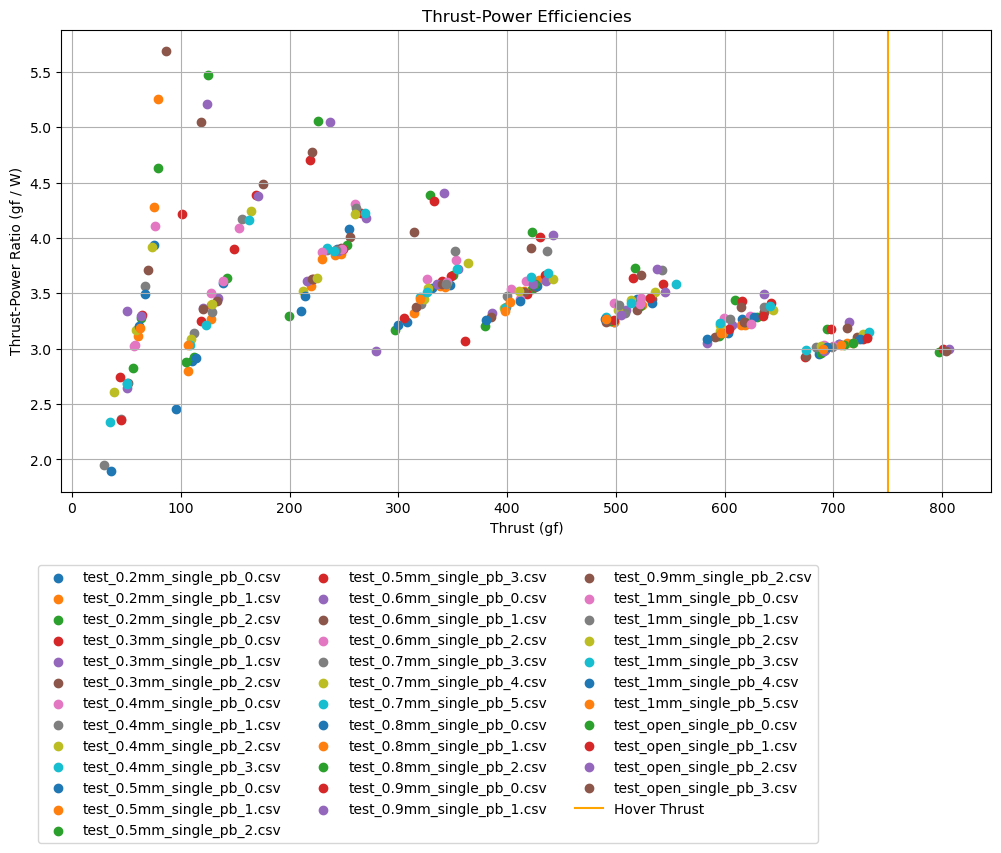

In [451]:
fig = plt.figure(figsize=(12, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="thrust_power_g_W", data=grp, label=n)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
# plt.xlim(400, 1750)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

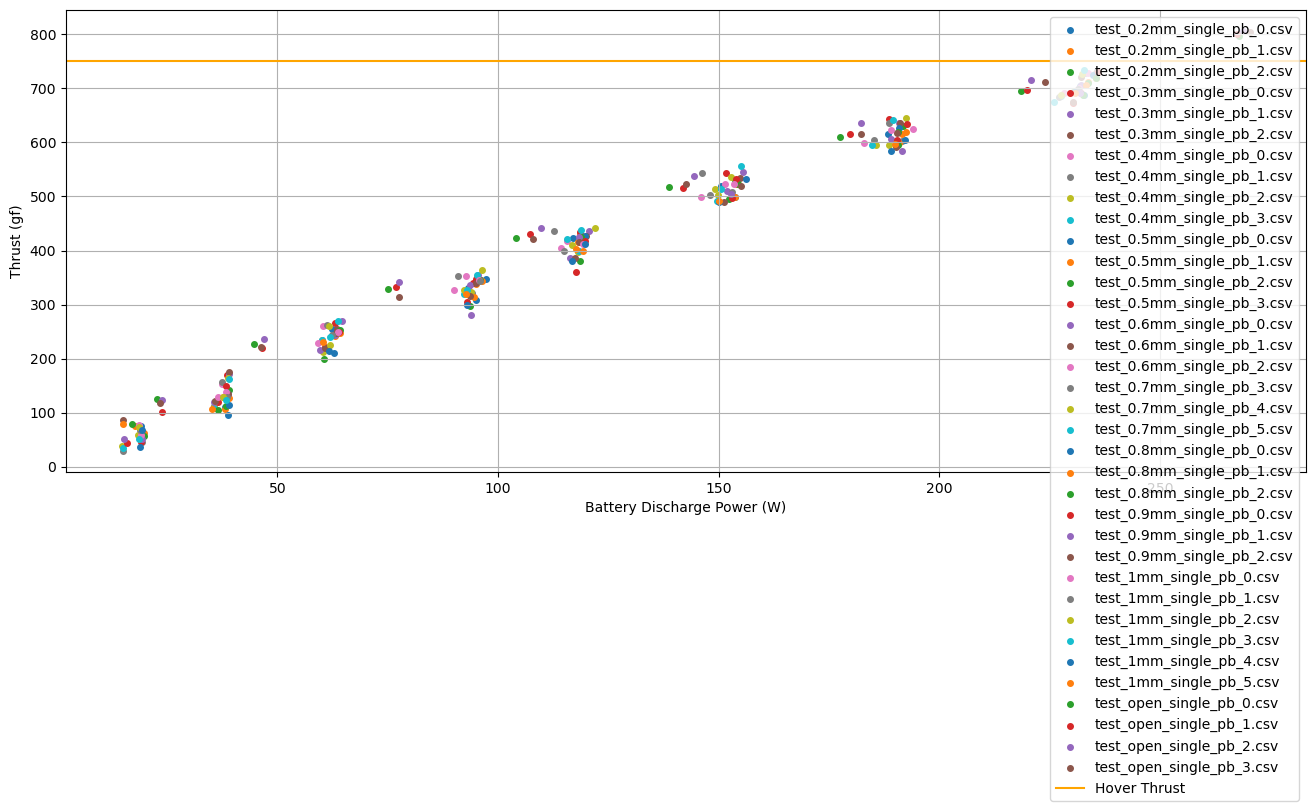

In [452]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="batt_power_mean", y="thrust_mean_g", data=grp, label=n, s=16)
plt.ylabel("Thrust (gf)")
plt.xlabel("Battery Discharge Power (W)")
plt.grid()
plt.axhline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.legend()
plt.show()

# My Stuff

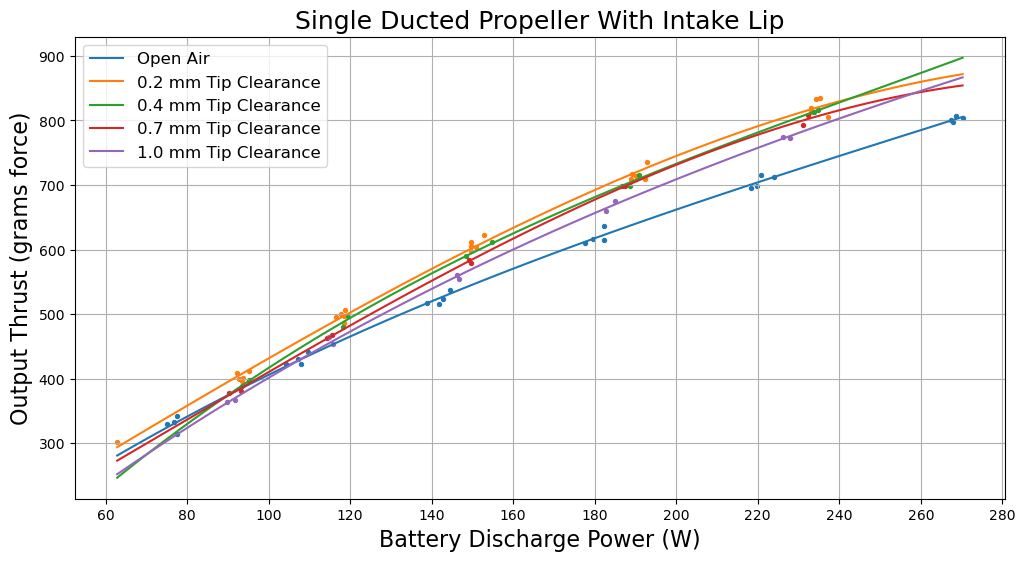

In [467]:
import numpy as np

DEGREE = 3
N = 100
min_thrust = 300
max_thrust = payload_thrust_g + 200

x_label = "batt_power_mean"
y_label = "thrust_mean_g"
err_label = "batt_power_err"
x_min = 1e9
x_max = -1e9


def extract_roi(grp, x_label, ylabel, min_thrust, max_thrust):
    grp = grp[grp["thrust_mean_g"] > min_thrust]
    grp = grp.sort_values("thrust_mean_g")
    x = grp[x_label].to_numpy()
    y = grp[y_label].to_numpy()
    err = grp[err_label].to_numpy()
    return x, y, err


plt.figure(figsize=(12, 6))

# Analyze data.
for n, grp in df_thrust_power.groupby("tip_clearance_mm"):
    x, y, err = extract_roi(grp, x_label, y_label, min_thrust, max_thrust)
    x_min = min(x_min, min(x))
    x_max = max(x_max, max(x))

x_dense = np.linspace(x_min, x_max, N)

# Plot inerpolation.
for n, grp in df_thrust_power.groupby("tip_clearance_mm"):
    x, y, err = extract_roi(grp, x_label, y_label, min_thrust, max_thrust)
    coeffs = np.polyfit(x, y, DEGREE)
    poly = np.poly1d(coeffs)
    legend_label = str(n) + " mm Tip Clearance"
    if (n == 0): legend_label = 'Open Air'

    plt.plot(x_dense, poly(x_dense), label=legend_label)
    plt.scatter(x, y, s=8)

plt.xlabel("Battery Discharge Power (W)", fontsize=16)
plt.ylabel("Output Thrust (grams force)", fontsize=16)
plt.title('Single Ducted Propeller With Intake Lip', fontsize=18)
plt.grid()
plt.legend(fontsize=12)
plt.xticks(np.arange(60, 281, 20))
plt.yticks(np.arange(300, 901, 100))
plt.show()